## Principle Component Analysis (PCA) - Low Income Population in City of Toronto

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

## Importing data

In [17]:
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
df=pd.read_csv('Data_All_sorted_alpha_MVP_V6.csv')
df.head()

,Neighbourhood,Year,Home price,Change in housing pricing,Low income population,Change in low income pop,Total Area,Total Population,Pop 25 - 34 years,Recent Immigrants,TTC Stops,Health Providers,Businesses,Social Housing Units,Rent Bank Applicants,Future_change_low_income_pop,Future_Change_housing_pricing,Label
0,Agincourt-North,Six,234855.0,0.383812,29880,0.000369,7.3,30160,3920,4265,90,17,295,77,2,-0.000501,0.285052,GRE
1,Agincourt-South-Malvern-West,Six,245759.0,0.364585,21370,-0.038545,7.9,21565,2850,3060,121,79,1399,170,12,0.013172,0.307456,GRE
2,Alderwood,Six,252745.0,0.433282,11635,-0.012767,5.0,11655,1370,290,56,12,312,85,4,-0.000418,0.338412,GRE
3,Annex,Six,592630.0,0.457992,26020,0.174658,2.8,27480,6760,1260,86,192,2322,1065,11,0.076460,0.372706,YELL
4,Banbury-Don-Mills,Six,410468.0,0.475760,25000,0.056200,10.0,25435,2790,2400,125,65,735,304,21,0.006208,0.369330,YELL


## Standardize the Data

In [18]:
df.index = df.Neighbourhood
features = ['Home price','Change in housing pricing','Low income population',\
                           'Change in low income pop','Total Area','Total Population',\
                           'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                           'Social Housing Units','Rent Bank Applicants']
x = df.loc[:, features].values
y = df.loc[:,['Future_change_low_income_pop']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,Home price,Change in housing pricing,Low income population,Change in low income pop,Total Area,Total Population,Pop 25 - 34 years,Recent Immigrants,TTC Stops,Health Providers,Businesses,Social Housing Units,Rent Bank Applicants
0,-0.915485,0.030415,1.344126,-0.047602,0.590805,1.354236,0.547734,1.672921,0.435214,-0.538331,-0.389405,-0.817120,-0.865982
1,-0.845050,-0.211197,0.372085,-0.285160,0.720826,0.363464,-0.011531,0.876703,1.088226,1.217991,1.344868,-0.685879,-0.114385
2,-0.799924,0.652079,-0.739880,-0.127793,0.092391,-0.778893,-0.785094,-0.953607,-0.280994,-0.679970,-0.362700,-0.805830,-0.715663
3,1.395576,0.962590,0.903224,1.016391,-0.384353,1.045304,2.032138,-0.312668,0.350954,4.419028,2.794809,0.577144,-0.189545
4,0.218893,1.185874,0.786716,0.293235,1.175900,0.809571,-0.042892,0.440600,1.172486,0.821402,0.301791,-0.496778,0.562052


## PCA Projection to 2D

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,1.570817,-1.154259
1,1.686605,0.028293
2,-1.830872,-0.230938
3,3.388365,4.488052
4,1.802327,0.328742


In [6]:
df[['Future_change_low_income_pop']].head()

,Future_change_low_income_pop
Neighbourhood,
Agincourt-North,-0.000501
Agincourt-South-Malvern-West,0.013172
Alderwood,-0.000418
Annex,0.076460
Banbury-Don-Mills,0.006208


In [8]:
#finalDf = pd.concat([principalDf, df[['Future_change_low_income_pop']]],axis=1)
#finalDf.head(5)

In [9]:
pca.explained_variance_ratio_

array([0.41288884, 0.1500238 ])

### Making sure that 95% of the variance is retained:

In [10]:
pca = PCA(.90)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head(5)

,0,1,2,3,4,5,6
0,1.570817,-1.154259,0.340894,-0.447414,-0.135745,1.847786,1.080012
1,1.686605,0.028293,1.224947,0.837793,-0.497800,0.044838,-0.566684
2,-1.830872,-0.230938,0.610815,0.780392,0.822959,0.254790,0.303202
3,3.388365,4.488052,-0.256609,0.594436,-1.414713,-0.339125,-1.280853
4,1.802327,0.328742,1.109261,1.018823,0.124864,0.844730,0.120056


This shows for retaining 90% of the varience 6 components are required in the model. 

In [11]:
import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(df[['Future_change_low_income_pop','Home price','Change in housing pricing','Low income population',\
                           'Change in low income pop','Total Area','Total Population',\
                           'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                           'Social Housing Units','Rent Bank Applicants']])

In [12]:
corr_matrix

,Future_change_low_income_pop,Home price,Change in housing pricing,Low income population,Change in low income pop,Total Area,Total Population,Pop 25 - 34 years,Recent Immigrants,TTC Stops,Health Providers,Businesses,Social Housing Units,Rent Bank Applicants
Future_change_low_income_pop,1,0.1725,0.1164,0.1228,0.5879,0.0662,0.134,0.4473,0.0434,0.1223,0.18,0.4364,0.2986,0.0032
Home price,0.1725,1,0.0725,-0.1717,0.1353,-0.185,-0.168,0.043,-0.2959,-0.1408,0.2457,0.1314,-0.1244,-0.4282
Change in housing pricing,0.1164,0.0725,1,-0.1591,0.0662,-0.1395,-0.1583,0.0322,-0.0841,-0.1083,0.1433,0.1935,0.0044,-0.1148
Low income population,0.1228,-0.1717,-0.1591,1,0.2294,0.5999,0.9909,0.7656,0.755,0.6609,0.4443,0.4053,0.3482,0.4721
Change in low income pop,0.5879,0.1353,0.0662,0.2294,1,0.1902,0.2327,0.4225,0.1281,0.1637,0.1901,0.319,0.1729,-0.0224
Total Area,0.0662,-0.185,-0.1395,0.5999,0.1902,1,0.6006,0.3043,0.3187,0.8035,0.2139,0.3607,0.0173,0.3354
Total Population,0.134,-0.168,-0.1583,0.9909,0.2327,0.6006,1,0.7828,0.7392,0.6658,0.4472,0.4165,0.3576,0.4713
Pop 25 - 34 years,0.4473,0.043,0.0322,0.7656,0.4225,0.3043,0.7828,1,0.5506,0.424,0.4961,0.609,0.5311,0.3037
Recent Immigrants,0.0434,-0.2959,-0.0841,0.755,0.1281,0.3187,0.7392,0.5506,1,0.3741,0.3232,0.2362,0.2656,0.4778
TTC Stops,0.1223,-0.1408,-0.1083,0.6609,0.1637,0.8035,0.6658,0.424,0.3741,1,0.4367,0.6068,0.1326,0.3839


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


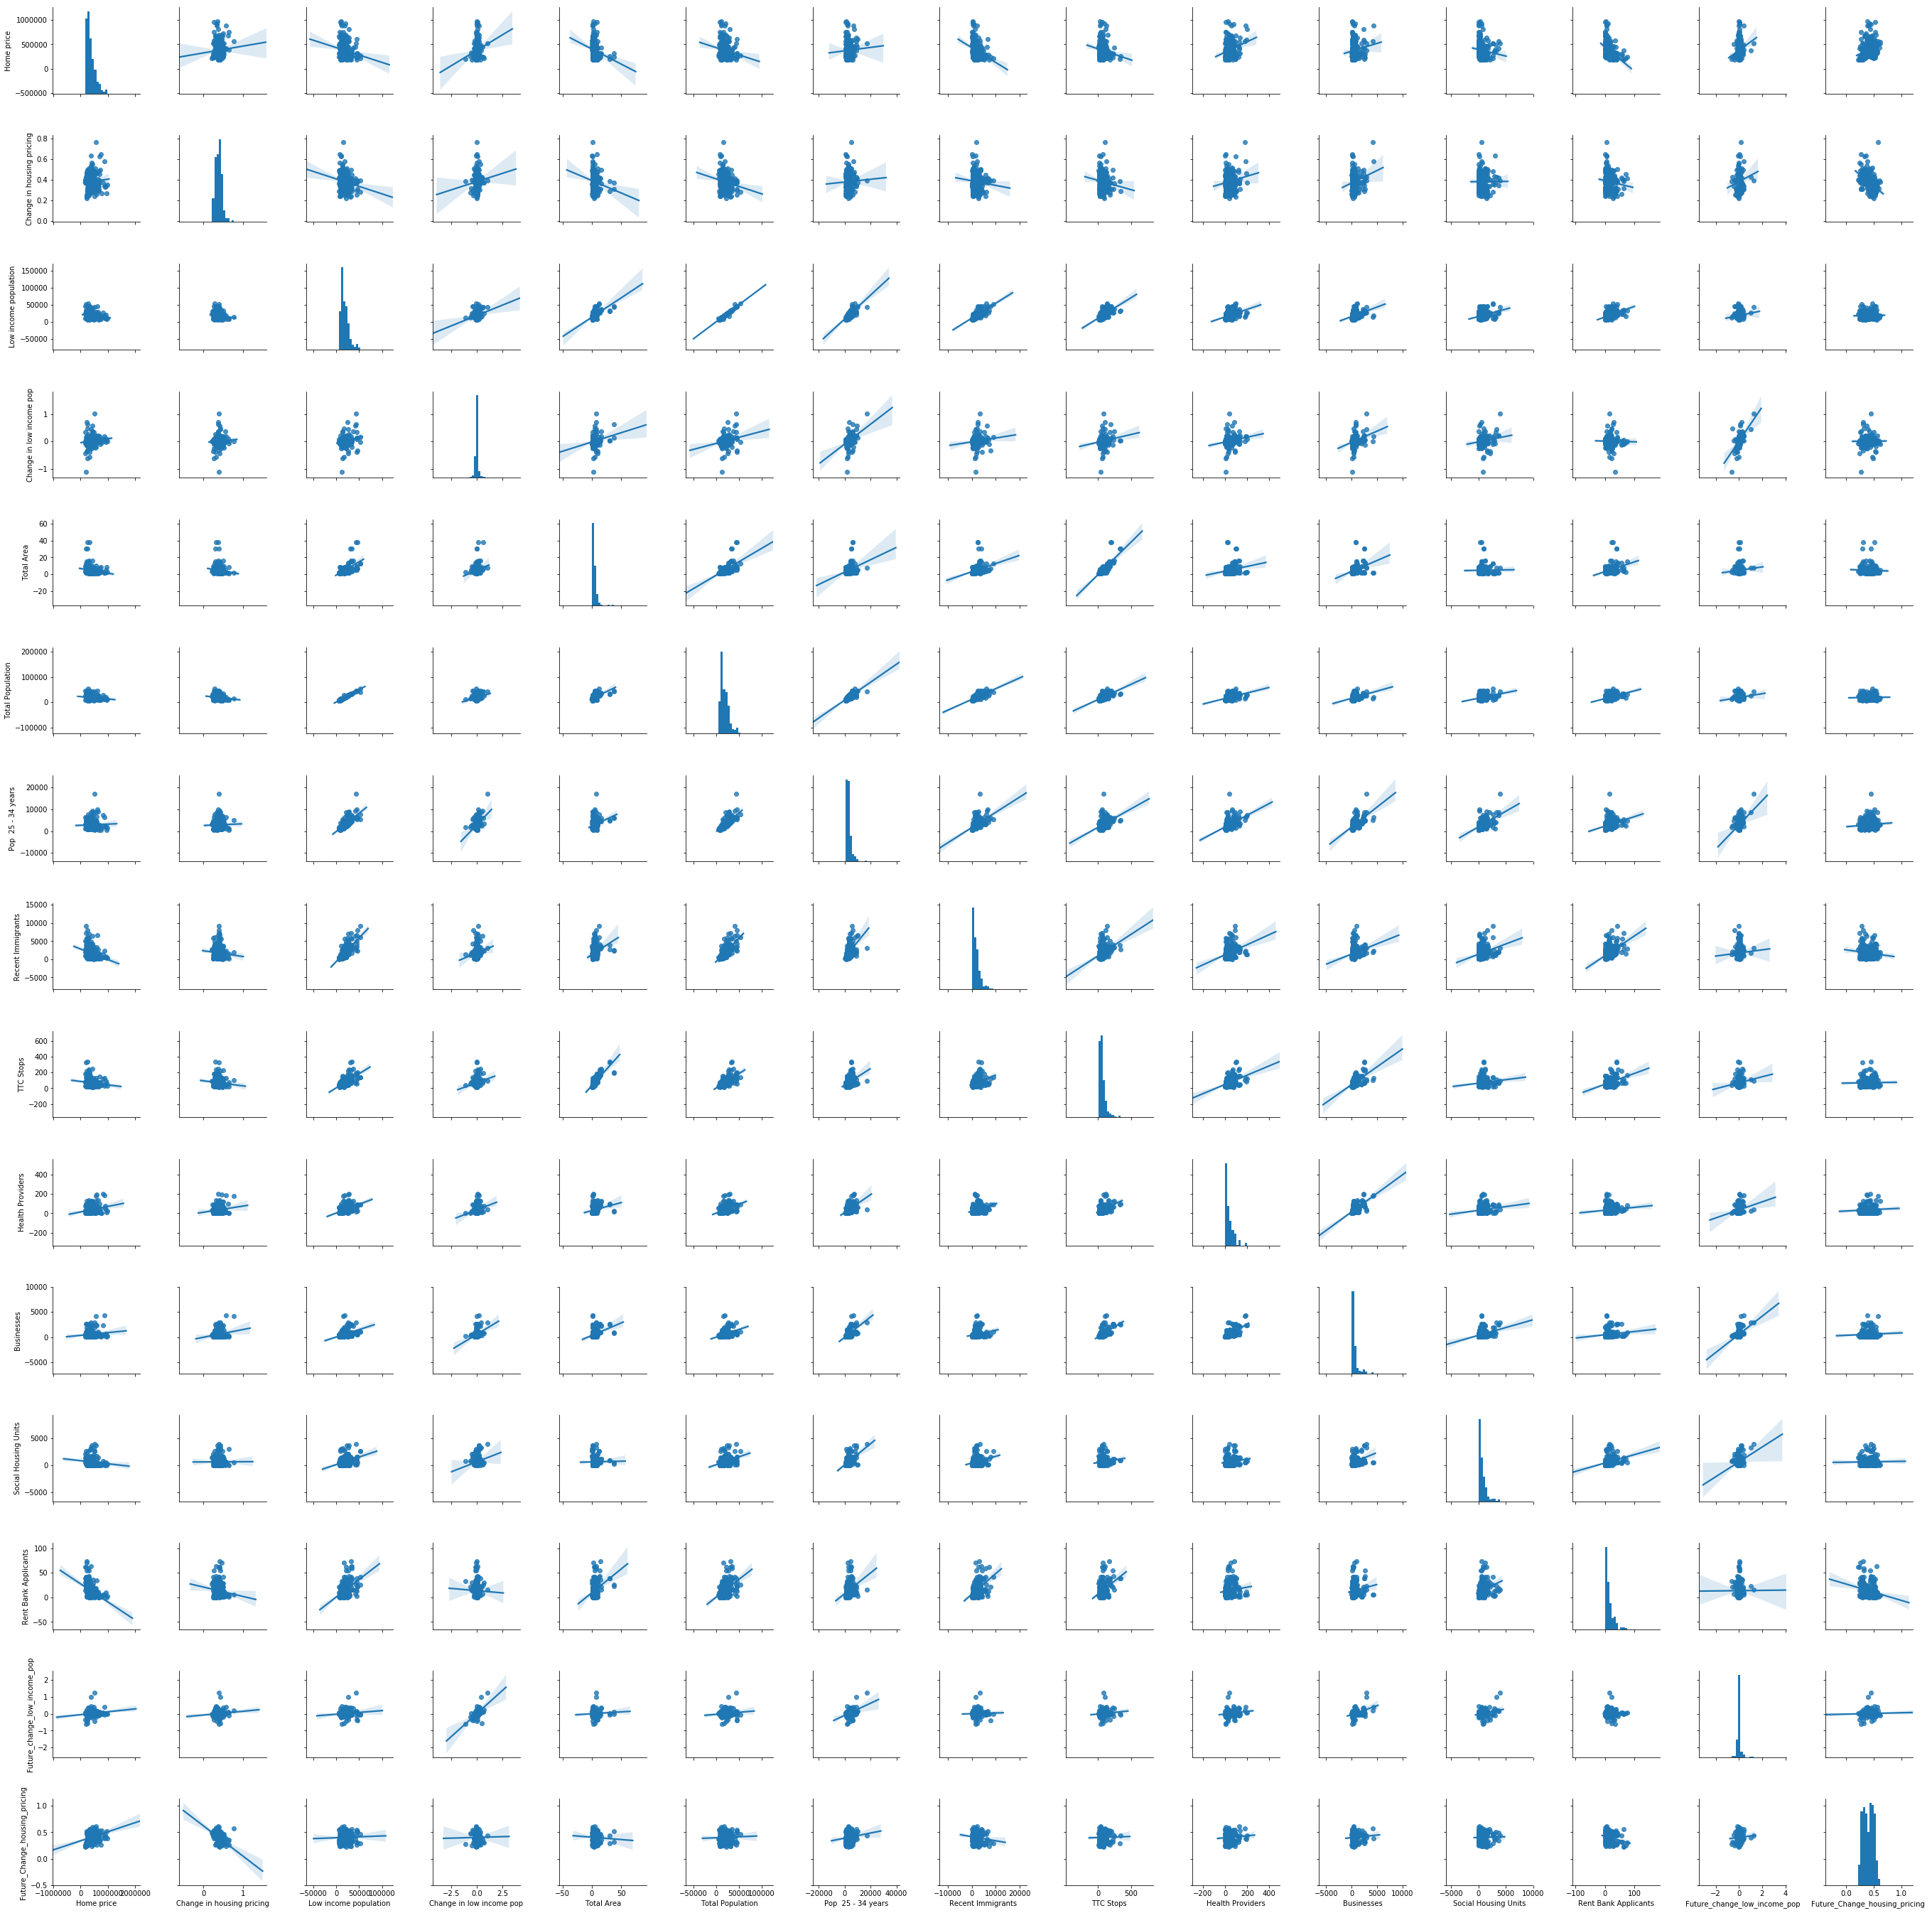

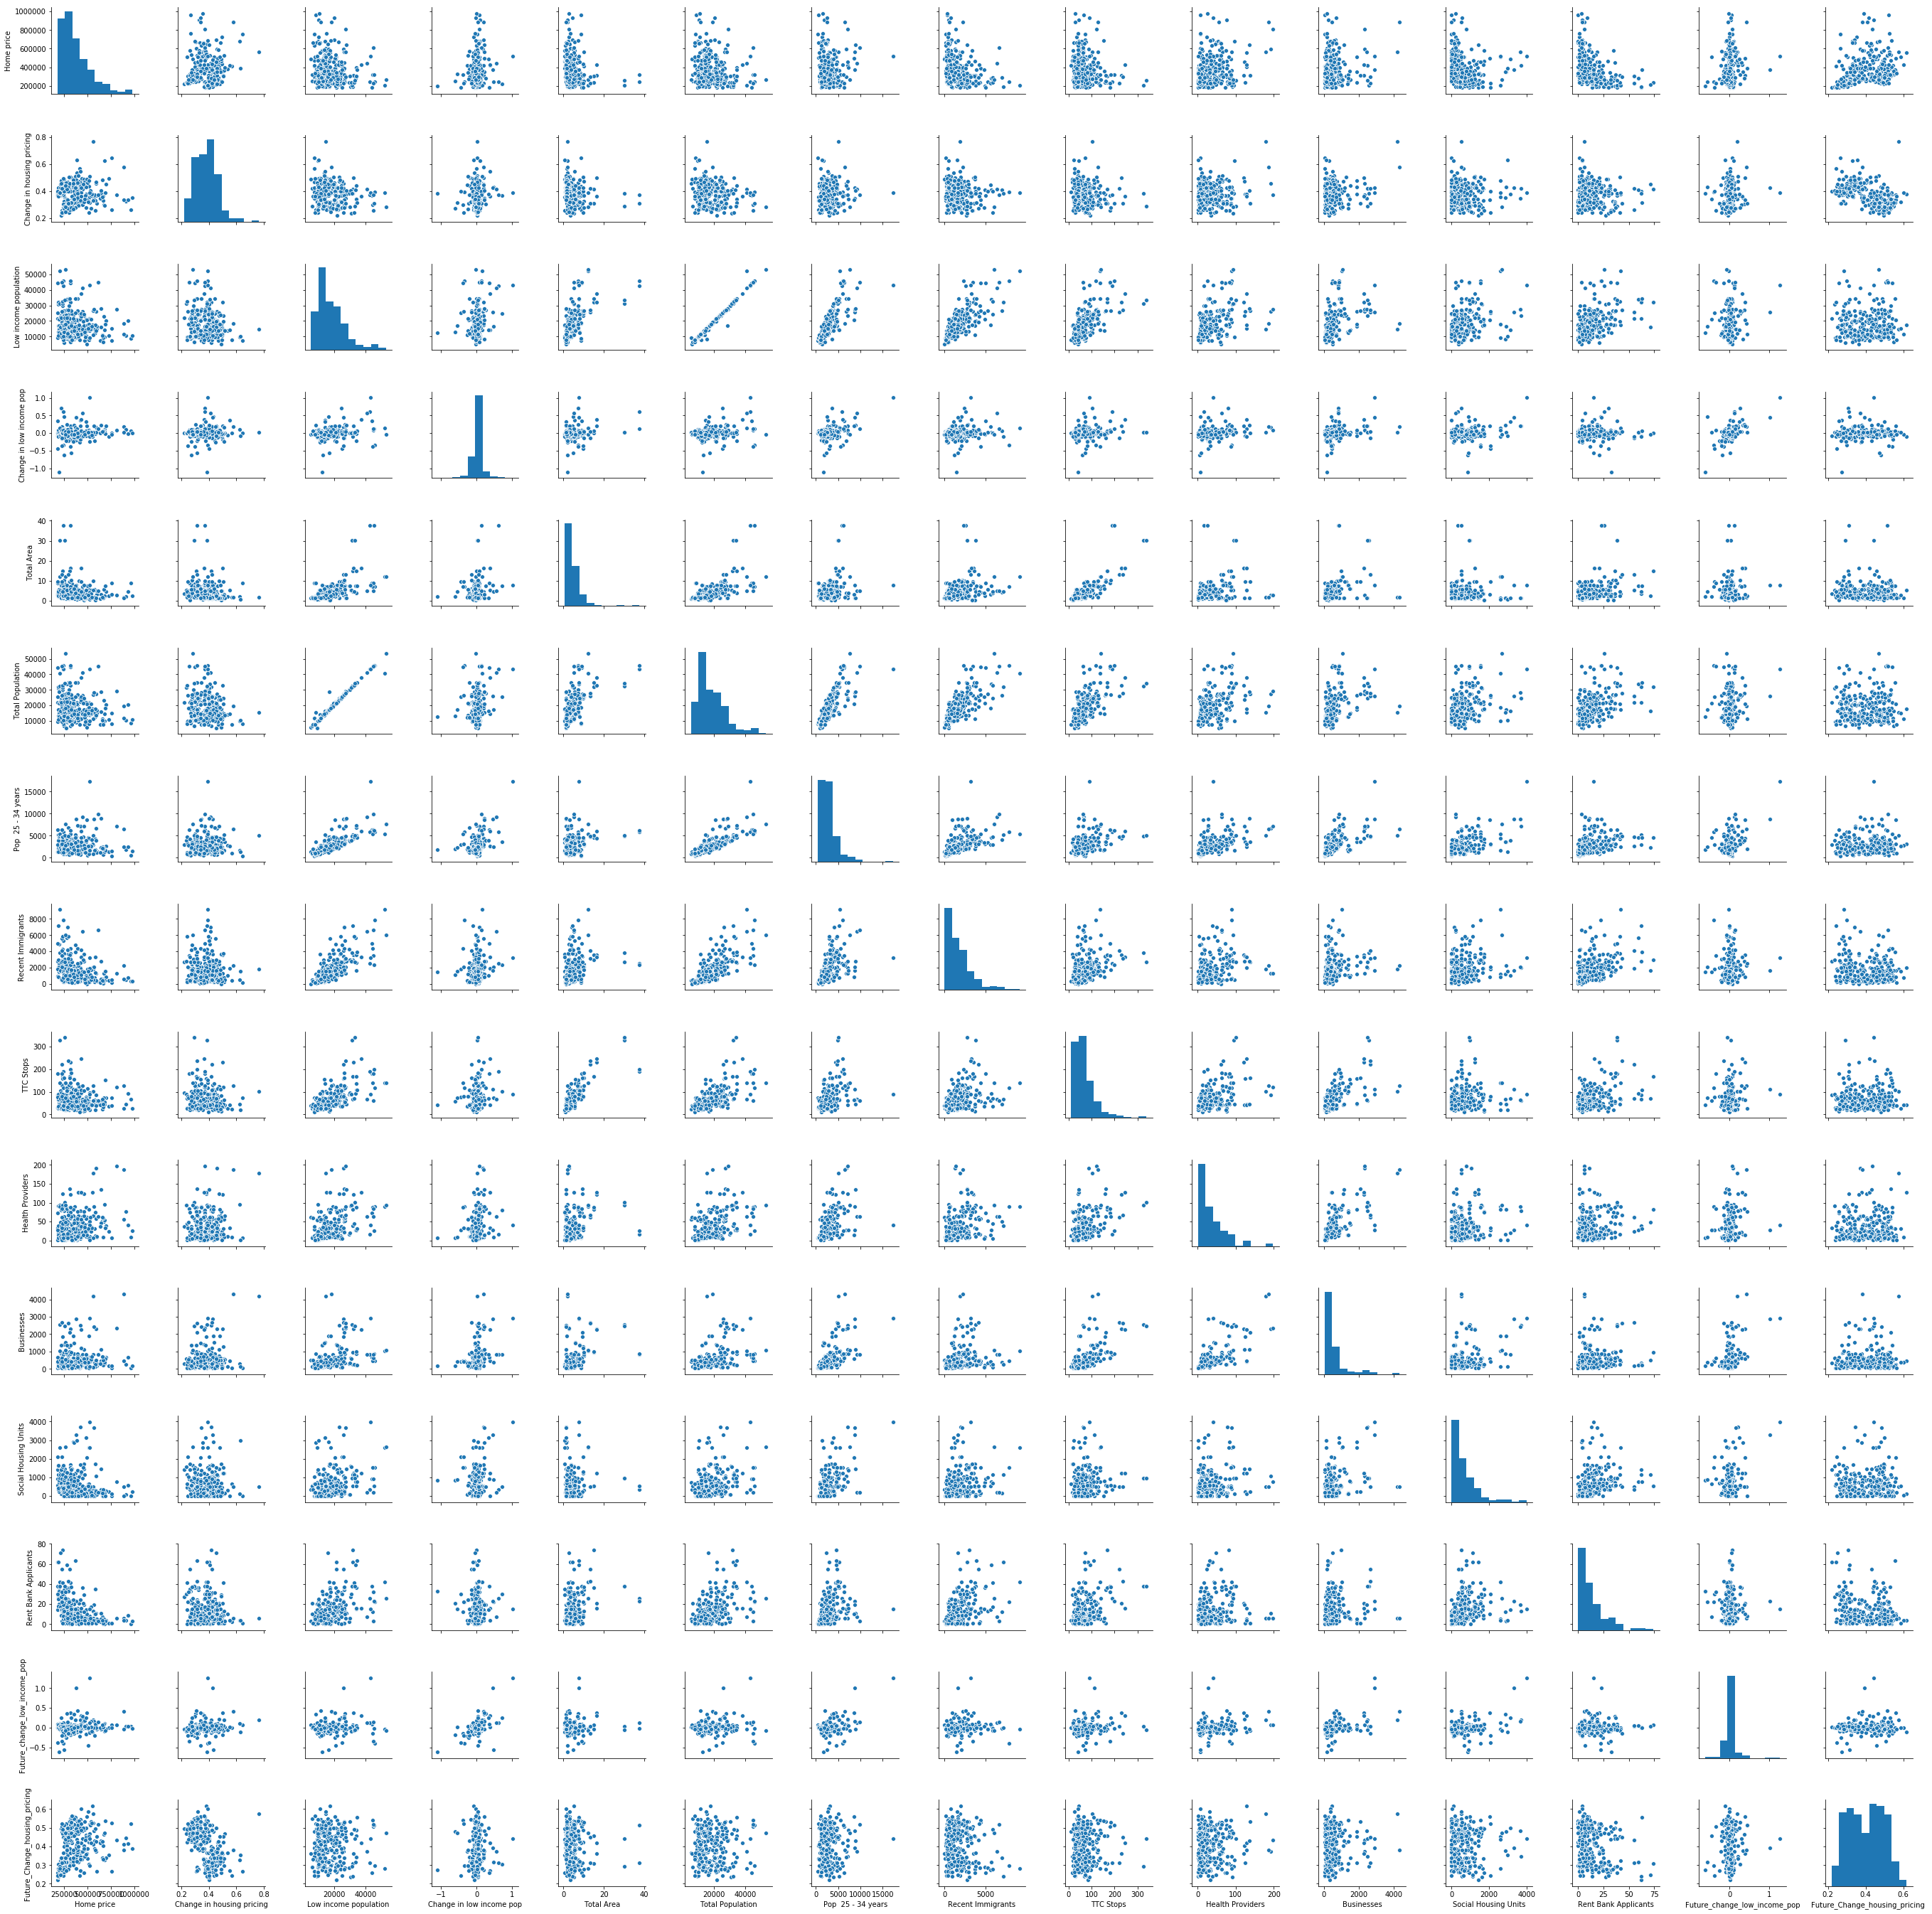

In [20]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
df=pd.read_csv('Data_All_sorted_alpha_MVP_V6.csv')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()
